# Wordcloud

Lage ordsky basert på kollokasjon

In [3]:
import dhlab as dh
import dhlab.nbtext as nb

In [8]:
# Last inn korpus
c = dh.Corpus(ddk='641*', from_year=1960, to_year=2020, limit=200)

In [10]:
c.corpus.head(3)

,dhlabid,urn,title,authors,oaiid,sesamid,isbn10,city,timestamp,year,publisher,langs,subjects,ddc,genres,literaryform,doctype
0,100447444,URN:NBN:no-nb_digibok_2009020604059,Norske nytelser og opplevelser,"Mellbye , Anne-Lise",oai:nb.bibsys.no:990112811624702202,25029a2dd2f232a7dd462786b4092e8a,,[Oslo],20010101,2001,[Landbruksdepartementet],nob,,641.59481 / 641.59,,Faglitteratur,digibok
1,100299786,URN:NBN:no-nb_digibok_2016062748142,Daniels osteløver : en steg-for-steg kokebok,"Wright , Lesley / Downing , Julie / Jackson , ...",oai:nb.bibsys.no:990105095694702202,6094bde8bcf9817d6ecc4b171caf9d05,8271125877,Oslo,20010101,2001,IKO-forl.,nob / eng,Kokebøker,641.51,,Faglitteratur,digibok
2,100501271,URN:NBN:no-nb_digibok_2007111500028,Skjell og skalldyr,"Hovig , Ingrid Espelid",oai:nb.bibsys.no:999110946794702202,eb2a4fd9a84a52d04fae1413fafe7f6f,8205193320,Oslo,19910101,1991,Gyldendal,nob,matlaging / kokebøker / skalldyrretter / kokin...,641.69,,Faglitteratur,digibok


In [65]:
# Kollokasjoner på 'sei'
coll = dh.Collocations(corpus=c, words='sei')

# Kopier kollokasjoner til ny dataramme
coll_df = coll.show().copy()
# Normalser
nb.normalize_corpus_dataframe(coll_df)

True

In [66]:
coll_df

,counts
",",0.088164
.,0.038647
og,0.035749
torsk,0.021256
i,0.018357
...,...
fennikel,0.000242
fennikelsalat,0.000242
ferdige,0.000242
ferske,0.000242


Tell tokens i korpus

In [33]:
# Tell tokens i korpus
counts = dh.Counts(c)

In [68]:
# Summer 
corpus_agg = counts.counts.sum(axis=1).to_frame()

In [73]:
nb.normalize_corpus_dataframe(corpus_agg)

True

Lag cloud med kollokasjoner vs totalen i korpus

In [74]:
cloud = coll_df.counts / corpus_agg[0]

In [75]:
cloud = cloud.sort_values(ascending=False).head(50).to_frame()

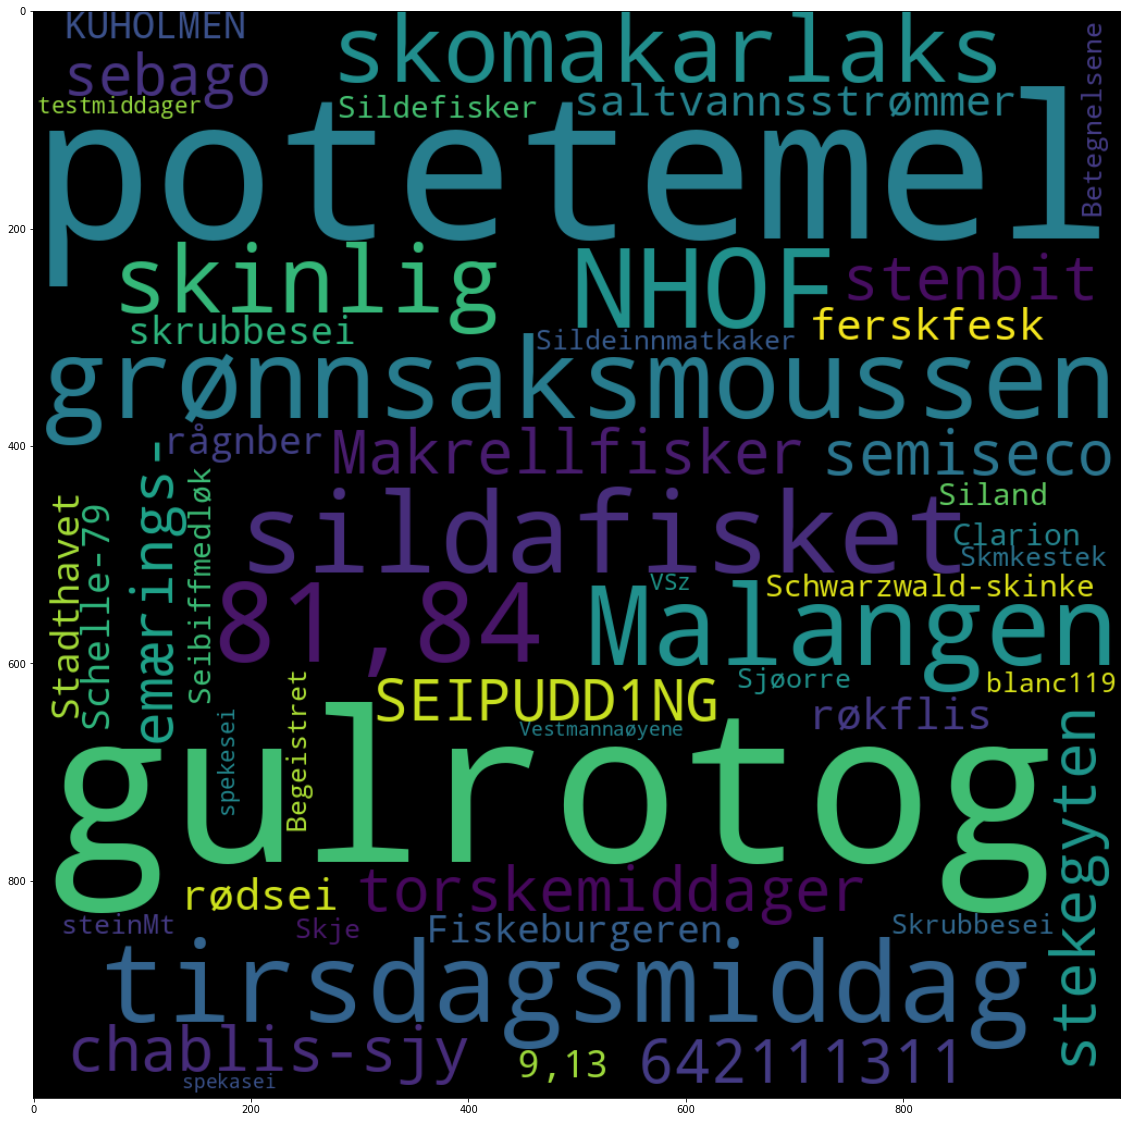

In [76]:
nb.cloud(cloud / cloud.sum() )